In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2
from urllib.request import urlopen
import tqdm

file_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Moon_and_Aurora.jpg/640px-Moon_and_Aurora.jpg"
rqst = urlopen(file_path)
arr = np.asarray(bytearray(rqst.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def resize(image, scale = 1):
    width, height = image_width_height(image)

    width = int(width * scale)
    height = int(height * scale)
    return cv2.resize(image, (width, height))

def image_width_height(image):
    width = image.shape[1]
    height = image.shape[0]
    return width, height

def image2X(image, width, height, channels = 3):
    return image.reshape([width * height, channels])

def X2image(X, width, height, channels = 3):
    return X.reshape([height, width, channels])

img = resize(img, 1.0)
width, height = image_width_height(img)

X = image2X(img, width, height, 3)

print(img.shape, X.shape)

(418, 640, 3) (267520, 3)


In [2]:
n_clusters = list(range(2, 30 + 1, 1))
kmeans = []
inertias = []

for i in range(len(n_clusters)):
    kmeans.append(KMeans(n_clusters = n_clusters[i], random_state = 42))
    kmeans[-1].fit(X)
    inertias.append(kmeans[-1].inertia_)

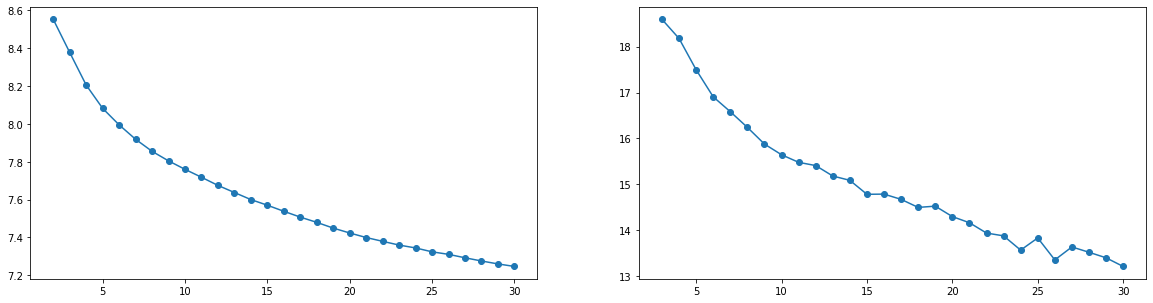

In [3]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.plot(n_clusters, np.log10(inertias), "-o")
plt.subplot(1, 2, 2)
plt.plot(n_clusters[1:], np.log(-np.diff(inertias)), "-o")
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 8)

kmeans.fit(X)

X_kmeans = kmeans.cluster_centers_[kmeans.predict(X)].astype("uint8")
img_kmeans = X2image(X_kmeans, width, height, 3)

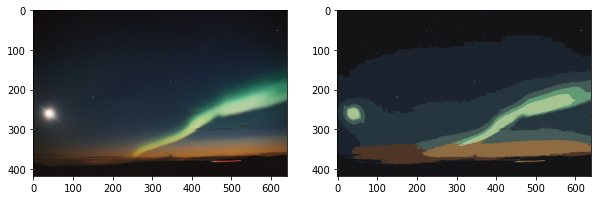

In [15]:
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans)
plt.show()